In [1]:
#install depenencies
!pip install kaggle

In [2]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"035bf7ada73bdcf7e45954662d427def"}'}

In [3]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#import the dataset we want to use for our project
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:38<00:00, 109MB/s] 
100% 9.51G/9.51G [01:38<00:00, 104MB/s]


In [6]:
!unzip aptos2019-blindness-detection

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [7]:
#lets see the imported files from kaggle competetion
!ls

aptos2019-blindness-detection.zip  sample_data		  test.csv     train.csv
kaggle.json			   sample_submission.csv  test_images  train_images


# **Unzip Data**

# **Load Training and Test Information in Dataframes**

In [8]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [9]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


# **Base Line**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



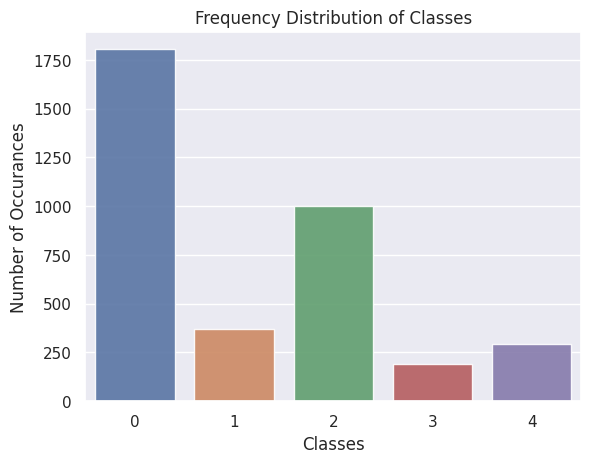

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Class_Frequency_Count.index,y=Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

# **Directory Structure Creation**

In [12]:
!rm -rf Training_Dir
!rm -rf Validation_Dir

In [13]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [14]:
import os

train_keyword = 'Training_Dir'
validation_keyword = 'Validation_Dir'
keywords = [train_keyword,validation_keyword]
dir_list = df_train['diagnosis'].tolist()

for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  for class_dir in dir_list:
    if(not os.path.exists(keyword+'/'+str(class_dir))):
      os.mkdir(keyword+'/'+str(class_dir))

In [15]:
import numpy as np
X = np.array(df_train.loc[:, df_train.columns == 'id_code'])
y = np.array(df_train.loc[:, df_train.columns == 'diagnosis'])

In [16]:
la =[]
count = 0
for x in X:
  if x in la:
    print('same')
  else:
    la.append(count)
    count=count+1


In [17]:
X_update = np.array(la)
X_update =X_update.reshape(-1, 1)

In [18]:
re = dict(zip(la,df_train['id_code'].tolist()))

In [19]:
from sklearn.model_selection import train_test_split #  train,test = train_test_split(dataset,test_size=0.20,stratify=True)
train_images_temp, val_images, train_labels_temp, val_labels = train_test_split(X_update, y, test_size=0.2,stratify=y)

In [20]:
#NU
split = int(0.7 * len(df_train)) # Change V2 0.8 to 0.7

train_dataframe = df_train.iloc[:split]
val_dataframe = df_train.iloc[split:]

#train_images = train_dataframe['id_code']
#train_labels = train_dataframe['diagnosis']
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

In [21]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '0': {}".format(sum(train_labels_temp==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_labels_temp==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(train_labels_temp==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(train_labels_temp==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(train_labels_temp==4)))

# Specify the sampling_strategy parameter
sm = SMOTE(sampling_strategy='minority')
train_images, train_labels = sm.fit_resample(train_images_temp, train_labels_temp.ravel())

print('After OverSampling, the shape of train_X: {}'.format(train_images.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(train_labels.shape))

print("After OverSampling, counts of label '0': {}".format(sum(train_labels==0)))
print("After OverSampling, counts of label '1': {} \n".format(sum(train_labels==1)))
print("After OverSampling, counts of label '2': {}".format(sum(train_labels==2)))
print("After OverSampling, counts of label '3': {} \n".format(sum(train_labels==3)))
print("After OverSampling, counts of label '4': {}".format(sum(train_labels==4)))


Before OverSampling, counts of label '0': [1444]
Before OverSampling, counts of label '1': [296] 

Before OverSampling, counts of label '2': [799]
Before OverSampling, counts of label '3': [154] 

Before OverSampling, counts of label '4': [236]
After OverSampling, the shape of train_X: (4219, 1)
After OverSampling, the shape of train_y: (4219,) 

After OverSampling, counts of label '0': 1444
After OverSampling, counts of label '1': 296 

After OverSampling, counts of label '2': 799
After OverSampling, counts of label '3': 1444 

After OverSampling, counts of label '4': 236


In [22]:
train_temp = []
for ds in train_images:
    if ds[0] in re:
        train_temp.append(re[ds[0]])
train_images = train_temp

val_temp = []
for ds in val_images:
    if ds[0] in re:
        val_temp.append(re[ds[0]])
val_images = val_temp

cx = []
for l in val_labels:
    cx.append([l])
val_labels = cx


In [23]:
list_of_tuples = list(zip(train_images,train_labels))
train_dataframe = pd.DataFrame(list_of_tuples,columns = ['id_code', 'diagnosis'])
train_dataframe = train_dataframe.sample(frac=1).reset_index(drop=True)
train_images = train_dataframe['id_code'].tolist()
train_labels = train_dataframe['diagnosis'].tolist()

In [24]:
list_of_tuples = list(zip(val_images,val_labels))
val_dataframe = pd.DataFrame(list_of_tuples,columns = ['id_code', 'diagnosis'])
val_dataframe = val_dataframe.sample(frac=1).reset_index(drop=True)
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

3    1444
0    1444
2     799
1     296
4     236
Name: diagnosis, dtype: int64



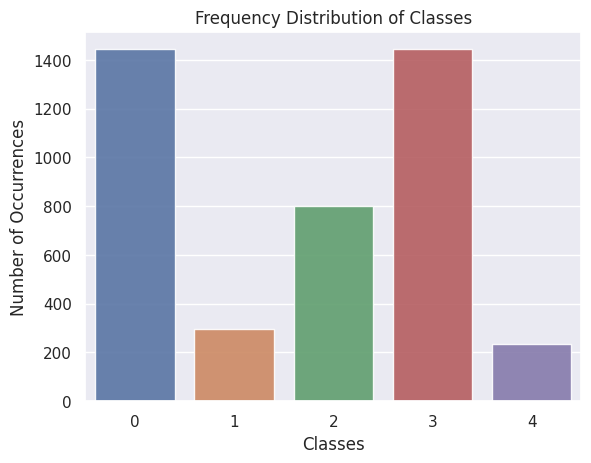

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Class_Frequency_Count = train_dataframe['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")

if Class_Frequency_Count.empty:
    print("Class_Frequency_Count is empty or missing values.")
else:
    sns.set(style="darkgrid")
    sns.barplot(x=Class_Frequency_Count.index, y=Class_Frequency_Count.values, alpha=0.9)
    plt.title("Frequency Distribution of Classes")
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.xlabel("Classes", fontsize=12)
    plt.show()


In [26]:
Class_Frequency_Count = val_dataframe['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
if Class_Frequency_Count.empty:
    print("Class_Frequency_Count is empty or missing values.")
else:
    sns.set(style="darkgrid")
    sns.barplot(x=Class_Frequency_Count.index, y=Class_Frequency_Count.values, alpha=0.9)
    plt.title("Frequency Distribution of Classes")
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.xlabel("Classes", fontsize=12)
    plt.show()



Series([], Name: diagnosis, dtype: int64)

Class_Frequency_Count is empty or missing values.


In [28]:
import shutil as cf
for keyword in keywords:
  image_list = []
  class_list = []
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  if keyword == train_keyword:
    image_list = train_images
    class_list = train_labels
  elif keyword == validation_keyword:
    image_list = val_images
    class_list = val_labels
  for image_info in image_list:
    cl = class_list[image_list.index(image_info)]
    cf.copy('train_images/'+str(image_info)+'.png', keyword+'/'+str(cl))

In [29]:
!rm -rf Train_Images

# **Image Data Generator**

In [30]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

train_dir = 'Training_Dir'
validation_dir = 'Validation_Dir'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 120
val_batchsize = 40

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

2.14.0
Found 3124 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


# **Fine Tuning Model**

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
# Finetuning on 5-class dataset
base_model = InceptionResNetV2(include_top=False, pooling='avg', weights='imagenet', input_shape=(299, 299, 3))
outputs = Dense(5, activation='softmax')(base_model.output)
model = keras.Model(base_model.inputs, outputs)

model.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

In [ ]:
for i, layer in enumerate(model.layers):
  if i < 776:
    layer.trainable = False
  else:
    layer.trainable = True

# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7fbecd72faf0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbecd7bc340> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbecd7bd720> False
<keras.src.layers.core.activation.Activation object at 0x7fbecd7bd9c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbecd7be080> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbecd7bf520> False
<keras.src.layers.core.activation.Activation object at 0x7fbecd7bf7c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbecd7bffa0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbecc5293c0> False
<keras.src.layers.core.activation.Activation object at 0x7fbecc52a050> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fbecc52a650> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbecc5297

# **Optimization & Model Compile**

In [ ]:
from keras.callbacks import LearningRateScheduler
from math import exp
epoch =20

In [ ]:
import tensorflow as tf

momentum = 0.9
sgd = tf.keras.optimizers.legacy.SGD(lr=0.001, momentum=momentum, decay=0.0, nesterov=False)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Regular Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

# **Fit Model**

In [ ]:
label_count=0
total_count=0
class_weights=0
from collections import Counter
labels_count = Counter(lbl for lbl in df_train['diagnosis'])
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in labels_count.items()}

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples /train_generator.batch_size,
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size,
    verbose=1
)


<ipython-input-90-b1ffa62ce6b8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


ValueError: ignored

# **Save Weights For Future Use**

In [ ]:
# Save Weights of the Model for Future Use
model.save_weights('Model_InceptionResnetV2.h5') # V2

# **Model Accuracy and Loss Plot**

In [ ]:
# Plot

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

# **Maximum Accuracy**

In [ ]:
# Max Accuracy

print("Validation Accuracy:", max(history.history['val_acc']))
print("Training Accuracy", max(history.history['acc']))

Validation Accuracy: 0.5388813119224116
Training Accuracy 0.6034537894793658
